**Goal: Predicting Customer Churn for Vodafone

Hypothesis
1.Increases in monthly charges causes customers to churn
2.Customers with multiple lines are less likely to churn
3.Tech support for customers reduces churn rate for categories such as females and senior citizens

Questions
 1. what is the chrun rate by:
i. Payment method
ii. Gender
iii. Patner Status
iv. Number of Dependents
 2. Does increase in monthly charges influence:
 a. churn rate by citizenship?
 b. churn rate paperless vs. non- paperless?
 3. Which internet  service customers churn the most?
 4. Does tech support influence customer churn in any way and by how much?


1.0 Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
# Normalization
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
#Model Evaluation
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, fbeta_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# Testing Features
from sklearn.feature_selection import SelectFromModel
# Cross Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  RandomizedSearchCV

#Others
import pickle, os

1.1 Loading and Exploring the dataset

In [3]:
data =pd.read_csv("C:/Users/HP/Documents/Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# previewing unique columns
unique_patner_status =(data.loc[:,'Partner']).value_counts()
unique_patner_status

No     3641
Yes    3402
Name: Partner, dtype: int64

In [6]:
unique_dependent_numbers =(data.loc[:,'Dependents']).value_counts()
unique_dependent_numbers

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [7]:
unique_SeniorCitizen_numbers =(data.loc[:,'SeniorCitizen']).value_counts()
unique_SeniorCitizen_numbers

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

1.2 Data Cleaning and Preprocessing

In [8]:
#convert totalcharges column to datatype; float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors = 'coerce')
print (data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


1.3 Pandas Profiling

In [9]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data, title="Pandas Profiling Report")
#profile

In [10]:
# dropping duplicates
data.drop_duplicates(inplace =True)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [11]:
# dealing with missing cells
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(data[['TotalCharges']])
data['TotalCharges'] = imputer.transform(data[['TotalCharges']])

In [13]:
#checking for changes
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
# drop customer ID column
data.drop(columns = ["customerID"], inplace = True)


In [16]:
# Encoding the categorical columns
categoricals = data.select_dtypes(include=["object"]).columns.to_list()
categoricals


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [17]:
# Encoding the categorical variables
encoder = OneHotEncoder(drop = "first", sparse = False)
encoder.fit(data[categoricals])
encoded_categoricals = encoder.transform(data[categoricals])
encoded_categoricals = pd.DataFrame(encoded_categoricals, columns = encoder.get_feature_names_out().tolist())
encoded_categoricals

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [18]:
# Adding the encoded categoricals to the DataFrame and dropping the original columns
data = data.join(encoded_categoricals)
data.drop(columns= categoricals, inplace= True)
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [19]:
#df_sample = data.sample(n= int(0.5*len(data)))

In [20]:
#df_sample

In [21]:
#df_sample.to_csv("data.csv")

1.6.**Feature Engineering and Preprocessing

1.6.1.Split data into Predictor and Response Variable

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   gender_Male                            7043 non-null   float64
 5   Partner_Yes                            7043 non-null   float64
 6   Dependents_Yes                         7043 non-null   float64
 7   PhoneService_Yes                       7043 non-null   float64
 8   MultipleLines_No phone service         7043 non-null   float64
 9   MultipleLines_Yes                      7043 non-null   float64
 10  InternetService_Fiber optic            7043 non-null   float64
 11  Inte

In [23]:
# Separate input features and target
X= data.drop(['Churn_Yes'], axis=1, inplace =False)

# Select Target
y = data['Churn_Yes']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of test label:', y_test.shape)

Shape of training feature: (5282, 30)
Shape of testing feature: (1761, 30)
Shape of training label: (5282,)
Shape of test label: (1761,)


1.6.2 Normalization

In [25]:
#Normalization
scaler = MinMaxScaler()

In [26]:
data_transform =['tenure', 'MonthlyCharges', 'TotalCharges']

In [27]:
data[data_transform]=scaler.fit_transform(data[data_transform])
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0.013889,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,0.472222,0.385075,0.215867,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0.027778,0.354229,0.010310,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,0.625000,0.239303,0.210241,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0.027778,0.521891,0.015330,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.662189,0.227521,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
7039,0,1.000000,0.845274,0.847461,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7040,0,0.152778,0.112935,0.037809,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7041,1,0.055556,0.558706,0.033210,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


1.6.3.Check for Class Imbalance

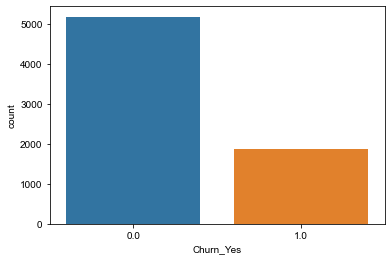

In [28]:
labels =['Churn_Yes','No_Churn']
sns.color_palette()
sns.countplot(data.Churn_Yes)
sns.set(rc={'figure.figsize':(8,8)})

1.6.4.Perform SMOTE Sampling

In [29]:
sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_train, y_train = sm.fit_resample(X_train, y_train)
np.unique(y_train, return_counts =True)

(array([0., 1.]), array([3900, 3900], dtype=int64))

1.6.5. Model Building with (SMOTE) Balancing

1.Decision Tree

In [30]:
#joining the trainset for modelling
train_set = X_train.join(y_train, on = X_train.index)
train_set.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,59.20,59.2,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0,29,58.75,1696.2,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0,72,65.50,4919.7,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,23,20.30,470.6,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,72,92.40,6786.1,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0


In [31]:
#joining the testset for modelling
test_set = X_test.join(y_test, on = X_test.index)
test_set.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
4903,0,5,90.80,455.50,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2695,0,52,81.40,4354.45,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2184,1,2,88.55,179.25,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
6024,0,3,91.50,242.95,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
5861,0,35,19.25,677.90,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [32]:
# Separate input features and target
X= train_set.drop(['Churn_Yes'], axis=1, inplace =False)

# Select Target
y = train_set['Churn_Yes']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


In [34]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_pred= dt.predict(X_test)

In [36]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['Decision Tree',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Decision Tree  0.807692   0.797872  0.802139       0.8  0.801282


In [37]:
dtree = DecisionTreeClassifier(max_depth =10, random_state = 101, max_features= None, min_samples_leaf = 15)
dtree_smote =dtree.fit(X_train, y_train)

In [38]:
dtree_pred = dtree_smote.predict(X_test)
dtree_true = y_test

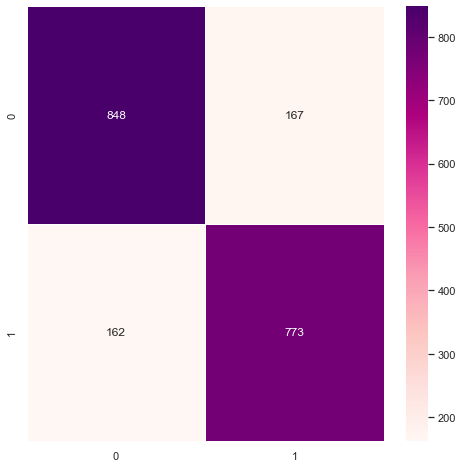

In [39]:
#visualizing Confusion Matrix
cm_dtree = confusion_matrix(dtree_true, dtree_pred)
f,ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm_dtree, annot =True, linewidth =0.5, fmt=".0f",cmap ='RdPu', ax =ax)
plt.xlabel = ('dtree_pred')
plt.ylabel =('dtree_true')
plt.show()

In [40]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)
print('Feature Importances:',dt.feature_importances_)



Feature Importances: [0.0164252  0.15627794 0.11436109 0.12538311 0.01416391 0.01683471
 0.01345562 0.01265938 0.00901971 0.01017043 0.04755296 0.00051438
 0.00051438 0.01045899 0.         0.01389094 0.00034292 0.0130367
 0.         0.01468302 0.         0.01111831 0.00317167 0.01721656
 0.03013472 0.02921251 0.04531274 0.00566413 0.25893117 0.00949278]


Text(0.5, 1.0, 'Feature Importance')

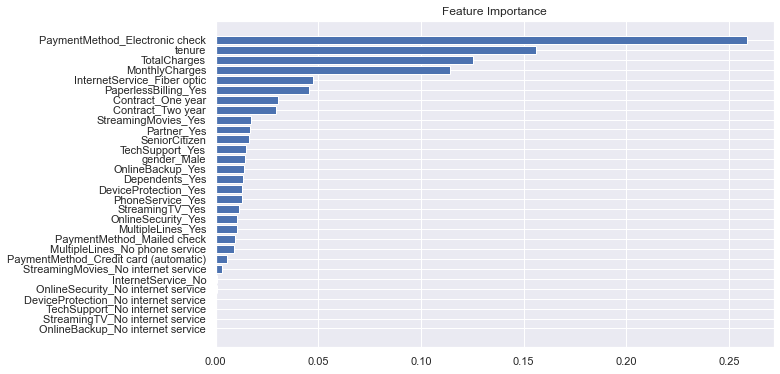

In [41]:
#plot feature importance

feature_importance = dt.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


2.Logistic Regression 

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [43]:
#predicting test results and calculating accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.76      1207
         1.0       0.73      0.80      0.76      1133

    accuracy                           0.76      2340
   macro avg       0.76      0.76      0.76      2340
weighted avg       0.76      0.76      0.76      2340



3.Gradient Boosting

In [45]:
xgc =xgb.XGBClassifier(n_estimators = 500, max_depth =5, random_state =42)
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [46]:
#predicting the testset results
y_pred =xgc.predict(X_test)

In [47]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier  0.833761   0.825744  0.832304  0.829011  0.830983


4.Support Vector Machines

In [48]:
SVC =SVC(kernel ='rbf')
SVC.fit(X_train,y_train)

SVC()

In [49]:
#predicting the testset results
y_pred =SVC.predict(X_test)

In [50]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['SVC',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

  Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0   SVC  0.641026   0.640191  0.590468  0.614325  0.599785


5.Random Forest


In [51]:
rf_clf = RandomForestClassifier()   
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
#predicting the testset results
y_pred =rf_clf.predict(X_test)

In [53]:
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)


           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.855128   0.848246  0.853486  0.850858  0.852433


1.6.7.Summarizing the performance of models

Observations: From the five models(SMOTE) performed to train the model, the Random Forest and Xgboost models have the highest F1 score of 85.2% and 82.5% respectivelyand since higher F1 scores are generally better, we go ahead to do some iterations to choose the best model.

1.6.8.** Iteration using Important Features

In [54]:
# evaluating model by using important features
# first visualize important features
xgc =xgb.XGBClassifier(random_state =42)
xgc.fit(X_train, y_train)
print('Feature Importances:',xgc.feature_importances_)

Feature Importances: [0.01036717 0.02716832 0.00797075 0.00915977 0.01507764 0.0182956
 0.00973231 0.03937767 0.         0.02601804 0.132918   0.02553219
 0.         0.03549222 0.         0.02512234 0.         0.01236963
 0.         0.02835647 0.         0.02275716 0.         0.02445823
 0.08320194 0.1764734  0.04001008 0.01055958 0.2010519  0.01852961]


Text(0.5, 1.0, 'Feature Importance')

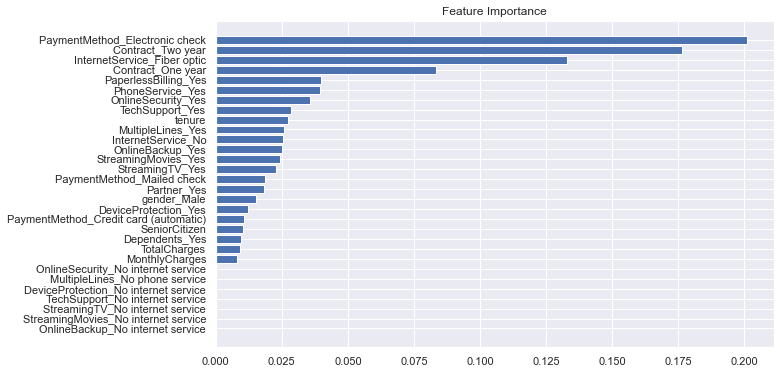

In [55]:
#plot feature importance
feature_importance = xgc.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')

In [56]:
selection=SelectFromModel(xgc)
selection.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        callbacks=None, colsample_bylevel=1,
                                        colsample_bynode=1, colsample_bytree=1,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=0, gpu_id=-1,
                                        grow_policy='depthwise',
                                        importance_type=None,
                                        interaction_constraints='',
                                        learning_rate=0.300000012, max_bin=256,
                                        max_cat_threshold=64,
                                        max_cat_to_onehot=4, max_delta_step=0,
                                        max_depth=6, max_leaves=0,
                                        min_child_weight=1, missing=nan,
                                        monotone_constraints='()',
                                        n_estimators=100, n_jobs=0,
                                        num_parallel_tree=1, predictor='auto',
                                        random_state=42, ...))

In [57]:
# transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

#train model
xgc.fit(select_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [58]:
#predicting test results
y_pred = xgc.predict(select_X_test)

#evaluating the model
xgc_acc=accuracy_score(y_test,y_pred)
xgc_fscore = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)

print('Limited Features XGBoost Model Accuracy:', xgc_acc)
print('Limited Features XGBoost Model F1 Score:', xgc_fscore)
print('Limited Features XGBoost Model F2 Score:', f2)

Limited Features XGBoost Model Accuracy: 0.8179487179487179
Limited Features XGBoost Model F1 Score: 0.8144599303135888
Limited Features XGBoost Model F2 Score: 0.8208955223880596


In [59]:

selection=SelectFromModel(rf_clf)
selection.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [60]:
# transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)

#train model
rf_clf.fit(select_X_train, y_train)

RandomForestClassifier()

In [61]:
#predicting test results
y_pred = rf_clf.predict(select_X_test)

#evaluating the model
rf_clf_acc=accuracy_score(y_test,y_pred)
rf_clf_fscore = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)

print('Limited Features RandomForest Model Accuracy:', rf_clf_acc)
print('Limited Features RandomForest Model F1 Score:', rf_clf_fscore)
print('Limited Features RandomForest Model F2 Score:', f2)

Limited Features RandomForest Model Accuracy: 0.8405982905982906
Limited Features RandomForest Model F1 Score: 0.8374727668845315
Limited Features RandomForest Model F2 Score: 0.843870741131015


Notes: the first model without the limited features for both XGBoost and RandomForest models perform better that with limited features therefore we stick to the first models

2.0. **Model Buidling without Smote Balancing

In [62]:
# Separate input features and target
wsb_X= train_set.drop(['Churn_Yes'], axis=1, inplace =False)

# Select Target
wsb_y = train_set['Churn_Yes']

wsb_X_train, wsb_X_test, wsb_y_train, wsb_y_test = train_test_split(wsb_X, wsb_y, test_size=0.25, random_state=27)

i.Decision Tree Model

In [63]:
dt =DecisionTreeClassifier()
dt.fit(wsb_X_train, wsb_y_train)
wsb_y_pred= dt.predict(wsb_X_test)
# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
dt_results_wsb = pd.DataFrame([['Decision Tree',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(dt_results_wsb)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Decision Tree  0.805128   0.796158  0.797861  0.797009   0.79752


ii.Logistic Regression Model

In [64]:
wsb_X_train, wsb_X_test, wsb_y_train, wsb_y_test = train_test_split(wsb_X, wsb_y, test_size=0.3, random_state=27)
logreg = LogisticRegression()
logreg.fit(wsb_X_train, wsb_y_train)

LogisticRegression()

In [65]:
#predicting test results and calculating accuracy
wsb_y_pred = logreg.predict(wsb_X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(wsb_X_test, wsb_y_test)))

Accuracy of logistic regression classifier on test set: 0.79


In [66]:
print(classification_report(wsb_y_test, wsb_y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1186
         1.0       0.77      0.82      0.79      1154

    accuracy                           0.79      2340
   macro avg       0.79      0.79      0.79      2340
weighted avg       0.79      0.79      0.79      2340



iii.  Gradient Boosting

In [67]:
xgc_wsb =xgb.XGBClassifier(n_estimators = 500, max_depth =5, random_state =42)
xgc_wsb.fit(wsb_X_train, wsb_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [68]:
#predicting the testset results
wsb_y_pred =xgc_wsb.predict(wsb_X_test)

# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results2 = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results2)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier  0.851282   0.860465  0.833622  0.846831  0.838856


iv. Random Classifier Model

In [69]:
rf_clf = RandomForestClassifier()   
rf_clf.fit(wsb_X_train, wsb_y_train)

RandomForestClassifier()

In [70]:
#predicting the testset results
wsb_y_pred =rf_clf.predict(wsb_X_test)
# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results3 = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results3)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.860256   0.870852  0.841421  0.855884  0.847147


In [71]:
#for randomforestclassifier (SMOTE)
rf_cl =RandomForestClassifier(n_estimators =33)
rf_cl.fit(X_train, y_train)
#predicting test results
y_pred = rf_cl.predict(X_test)
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.851709   0.844737  0.849956  0.847338  0.848907


In [72]:
#for randomforestclassifier ( Without SMOTE)
rf_cl_wsb =RandomForestClassifier(n_estimators =33)
rf_cl_wsb.fit(wsb_X_train, wsb_y_train)
#predicting the testset results
wsb_y_pred =rf_clf.predict(wsb_X_test)
# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results= pd.DataFrame([['Random Forest',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results)

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  Random Forest  0.860256   0.870852  0.841421  0.855884  0.847147


In [73]:
#for XGBClassifier(SMOTE)
xgc =xgb.XGBClassifier(n_estimators =500,max_depths =5, random_state=42)
xgc.fit(X_train, y_train)
#predicting test results
y_pred = xgc.predict(X_test)
# evaluating the model
acc=accuracy_score(y_test,y_pred)
prec= precision_score(y_test,y_pred)
rec= recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
f2 = fbeta_score(y_test,y_pred, beta =2.0)
results = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(results)

[11:04:46] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier   0.83547   0.826353  0.835834  0.831066   0.83392


In [74]:
#for XGBClassifier(Without SMOTE)
xgc_wsb =xgb.XGBClassifier(n_estimators =500,max_depths =5, random_state=42)
xgc_wsb.fit(wsb_X_train, wsb_y_train)

#predicting the testset results
wsb_y_pred =xgc.predict(wsb_X_test)

# evaluating the model
acc=accuracy_score(wsb_y_test,wsb_y_pred)
prec= precision_score(wsb_y_test,wsb_y_pred)
rec= recall_score(wsb_y_test,wsb_y_pred)
f1 = f1_score(wsb_y_test,wsb_y_pred)
f2 = fbeta_score(wsb_y_test,wsb_y_pred, beta =2.0)
wsb_results2 = pd.DataFrame([['XGBClassifier',acc, prec, rec, f1, f2]], columns =['Model','Accuracy','Presicion','Recall','F1 Score', 'F2 Score'])
print(wsb_results2)

[11:04:52] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.

           Model  Accuracy  Presicion    Recall  F1 Score  F2 Score
0  XGBClassifier  0.954274   0.950904  0.956672   0.95378  0.955513


In [75]:
accuracy_score(wsb_y_test, wsb_y_pred)

0.9542735042735043

4.0.**Evaluate Chosen model

4.1.Cross Validation and Hyperparameter Tuning

 XGboost models with smote with f1 score of 95% is selected, to perform cross validation and hyperparameter tuning.

In [76]:
#model on which to use CV with SMOTE
xgc =xgb.XGBClassifier(n_estimators =500, random_state =42)
#define cross-validation method
kfold =KFold(n_splits=5) 
#evaluate model
results =cross_val_score(xgc, X_train, y_train, cv=kfold)

scores = cross_val_score(xgc, X_train,y_train, cv=kfold, n_jobs=-1)
print(scores.mean())

0.8443223443223443


In [77]:
#model on which to use CV with Smote
rf_cl =RandomForestClassifier(n_estimators =500, random_state =42)
#define cross-validation method
kfold =KFold(n_splits=5) 
#evaluate model
results =cross_val_score(rf_cl, X_train, y_train, cv=kfold)

scores = cross_val_score(rf_cl, X_train,y_train, cv=kfold, n_jobs=-1)
print(scores.mean())

0.8554945054945055


In [78]:
#Hyperparameter(Grid Search Method) tuning for Random Forest Classifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5,verbose=1,n_jobs=-1 ) 
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             verbose=1)

In [79]:
grid_search.best_params_

{'max_features': 0.20000000000000004, 'n_estimators': 95}

In [80]:
grid_search.best_score_

0.8575091575091577

In [81]:
#Hyperparameter(Grid Search Method) tuning for XGB Classifier
grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5, verbose=1,n_jobs=-1 ) 
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits
[11:41:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             verbose=1)

In [82]:
grid_search.best_params_

{'max_features': 0.1, 'n_estimators': 25}

In [83]:
grid_search.best_score_

0.8593406593406595

Model's best score for Random Classifier and XGB is  0.8569 and 0.8589 respectively using GridSearch method

In [84]:
# Hyperparameter tuning (Randomized search method)n forXGBClassifier
random_search = RandomizedSearchCV(xgb.XGBClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5, verbose=1,n_jobs=-1, n_iter=50, random_state = 0 ) 
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[11:44:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_features" } are not used.



RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, verbose=1)

In [85]:
random_search.best_params_

{'n_estimators': 25, 'max_features': 0.8500000000000002}

In [86]:
random_search.best_score_

0.8593406593406595

In [87]:
# Hyperparameter tuning (Randomized search method) for RandomForest Classifier
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
{ 'n_estimators':np.arange(5,100,5), 'max_features':np.arange(0.1,1.0,0.05), }
,cv=5,verbose=1,n_jobs=-1, n_iter=50, random_state = 0 ) 
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, verbose=1)

In [88]:
random_search.best_params_

{'n_estimators': 95, 'max_features': 0.20000000000000004}

In [89]:
random_search.best_score_

0.8575091575091577

models best score for Randomclassifier model is 0.8558 and Model's best score for XGBClassifier is 0.8589 using Randomsearch Method

From both the Gridsearch and Randomized search,XGBoost model still performs a little higher  than Randomclassifier model and so we settle on XGBoost to build an optimized version of the model using the combination of hyperparameters  from the Randomizedsearch method.

5.0.**  Future Prediction

In [90]:
#fitting the best model to the train data
best_XGBoost_model =random_search.fit(X_train,y_train)
#predicting the testset results
best_XGBoost_pred =best_XGBoost_model.predict(X_test)
#evaluating the model
print(classification_report(y_test, best_XGBoost_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.86      1207
         1.0       0.85      0.86      0.85      1133

    accuracy                           0.86      2340
   macro avg       0.86      0.86      0.86      2340
weighted avg       0.86      0.86      0.86      2340



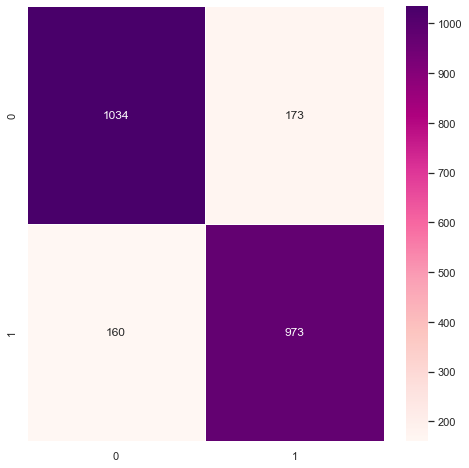

In [91]:
#visualizing Confusion Matrix
cm_best_XGBoost = confusion_matrix(y_test, best_XGBoost_pred)
f,ax = plt.subplots(figsize =(8,8))
sns.heatmap(cm_best_XGBoost, annot =True, linewidth =0.5, fmt=".0f",cmap ='RdPu', ax =ax)
plt.xlabel = ('best_XGBoost_pred')
plt.ylabel =('y_test')
plt.show()

In [92]:
#get final_cv_score
#define cross-validation method
kfold =KFold(n_splits=5) 
final_cv_score =cross_val_score(best_XGBoost_model, X_train, y_train, cv=kfold)

final_cv_score = cross_val_score(best_XGBoost_model, X_train,y_train, cv=kfold, n_jobs=-1)
print(final_cv_score.mean())

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
0.854029304029304


conclusion: From the scores and confusion matrix above, we see that this version of the model (Xgboost with SMOTE) is the best for now with an average cross validation score of 85.40% and F1(0.85). We can expect that this model will reliably predict which customers are likely to churn and inform Vodafone what strategies to implement for customer retention

** Save Requirements

In [93]:
requirements = '\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None))

with open('requirements.txt', 'w') as f:
    f.write(requirements)

In [94]:
to_export = {
    "encoder": encoder,
    "scaler": scaler,
    "model": logreg,
    "pipeline": None,
}

** Exportation

In [95]:
with open('ML_tools', 'wb') as file:
    pickle.dump(to_export, file)

** Loading after Exportation

In [96]:
with open('ML_tools', 'rb') as file:
    loaded_object = pickle.load(file)


loaded_object

In [97]:
{'encoder': encoder,
 'scaler': scaler,
 'model':logreg}

{'encoder': OneHotEncoder(drop='first', sparse=False),
 'scaler': MinMaxScaler(),
 'model': LogisticRegression()}